## Lending_Club
Dataset from kaggle.com

判斷是否能夠付清房貸

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data_info = pd.read_csv('lending_club_info.csv')

In [32]:
data_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [33]:
def feat_info(col_name):
    print(data_info[data_info['LoanStatNew']==col_name]['Description'].values[0])

In [34]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


### Data Analysis

In [35]:
df = pd.read_csv('lending_club_loan_two.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Data Analysis

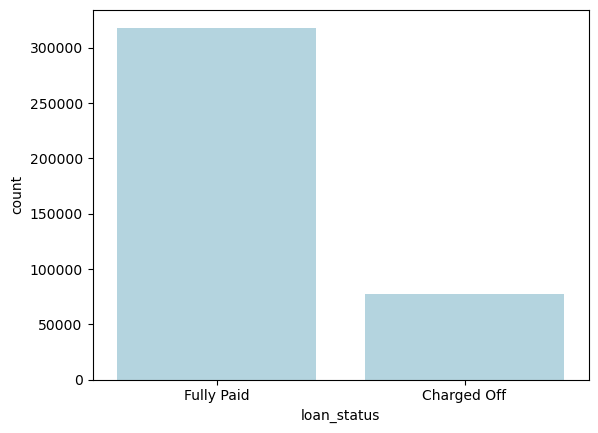

In [44]:
# 是否繳清數量
sns.countplot(x = 'loan_status', data = df, color='lightblue')
plt.show()

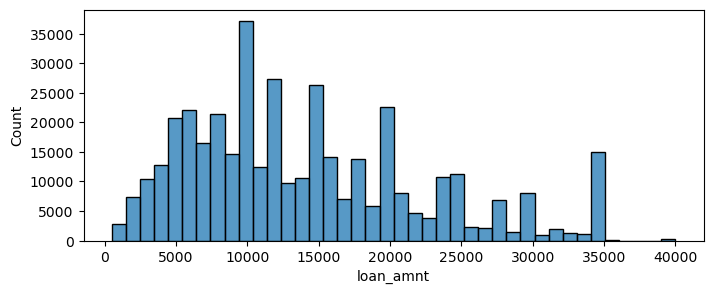

In [47]:
# 房貸分佈數量
plt.figure(figsize = (8, 3))
sns.histplot(x = 'loan_amnt', data = df, bins = 40)
plt.show()

In [48]:
# 相關性
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


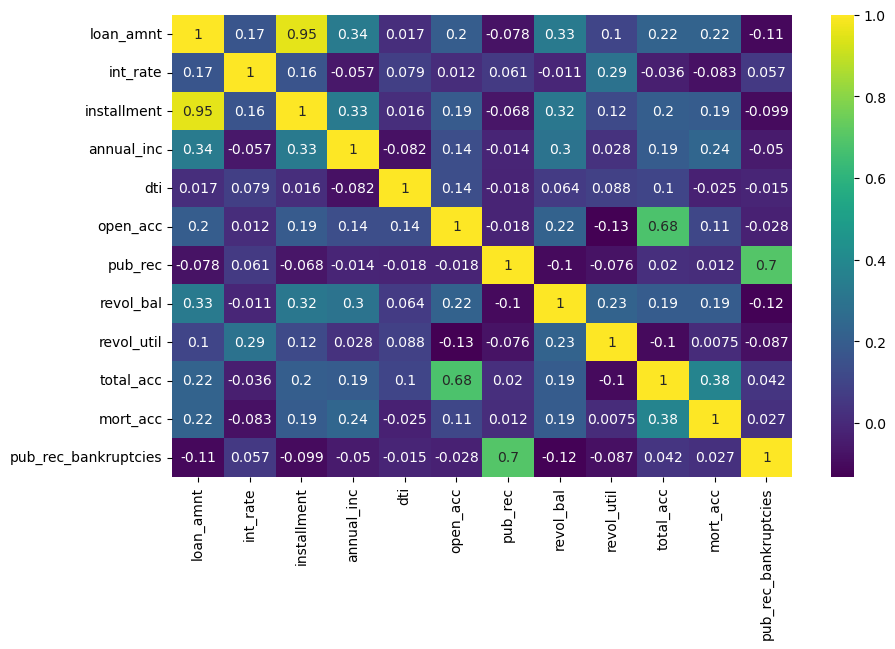

In [55]:
# 相關性分佈
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)
plt.show()

In [57]:
# 每月分期付款 和 房貸 的相關性高，查看介紹
feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


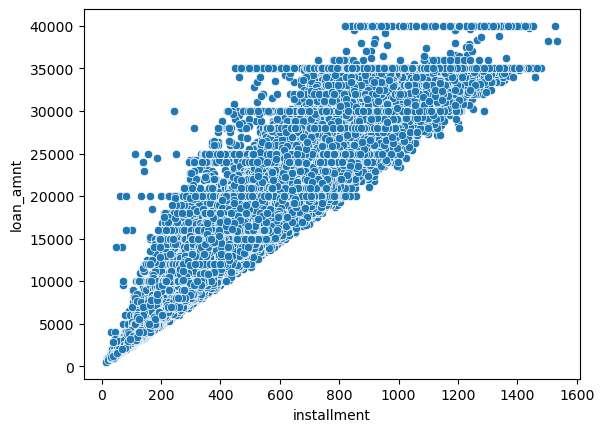

In [58]:
# 每月分期付款 和 房貸分佈
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)
plt.show()

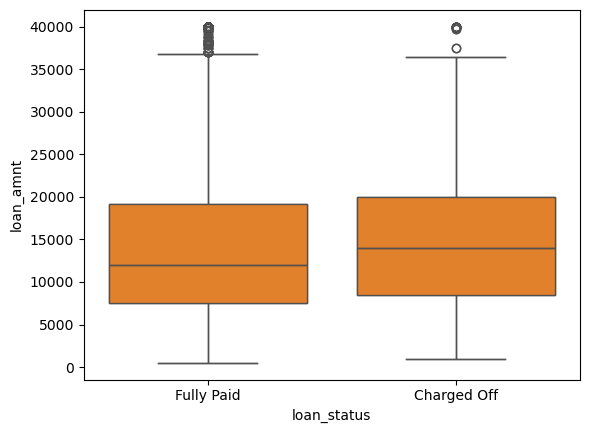

In [62]:
# 是否繳清 及 房貸 關係
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

In [63]:
# 是否繳清 及 房貸 數值
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [64]:
df['grade'].sort_values().unique().tolist()

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [65]:
df['sub_grade'].sort_values().unique().tolist()

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

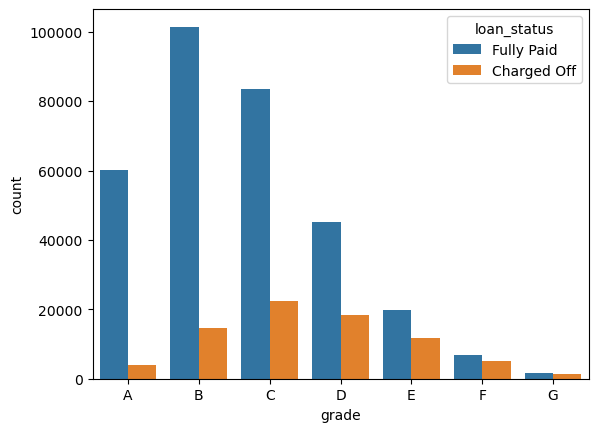

In [66]:
# 成績對應是否繳清之數量
sns.countplot(x = 'grade', data = df, 
              hue = 'loan_status', 
              order = df['grade'].sort_values()
             )
plt.show()

/var/folders/pw/qqmtppg56fs6hj9nq4rqltsc0000gn/T/ipykernel_92416/1460675916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sub_grade', data = df,


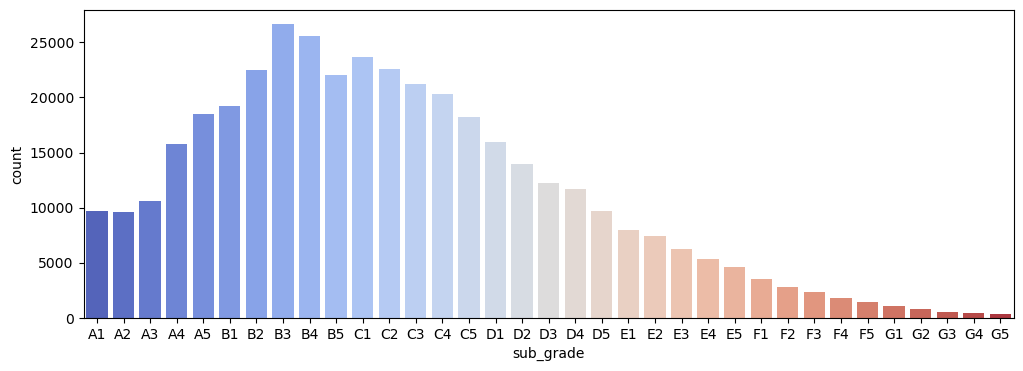

In [77]:
# 詳細成績數量
plt.figure(figsize = (12, 4))
subgrade_order = df['sub_grade'].sort_values().unique()
sns.countplot(x = 'sub_grade', data = df, 
              palette = 'coolwarm', 
              order = subgrade_order)
plt.show()

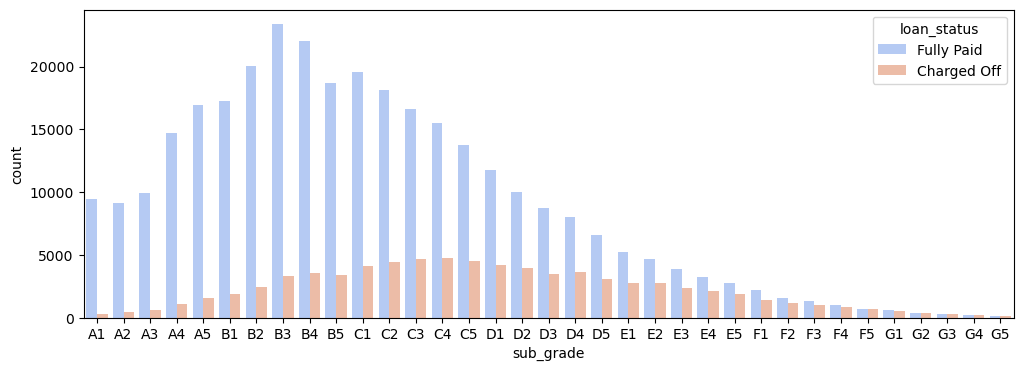

In [82]:
# 詳細成績對應是否繳清之數量
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,
              order = subgrade_order,
              palette='coolwarm' ,
              hue='loan_status')
plt.show()

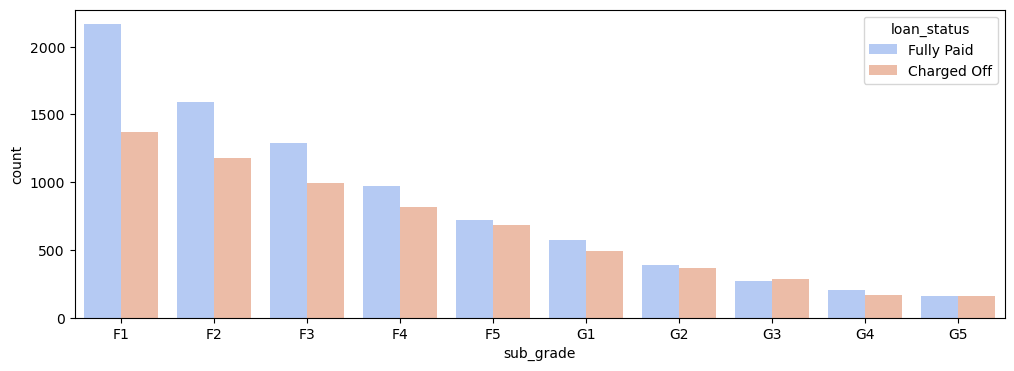

In [83]:
# G & F繳清比例較低，G & F對應是否繳清之數量
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize = (12, 4))
order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = f_and_g['sub_grade'], data = df, 
              palette = 'coolwarm', hue = 'loan_status', 
              order = order)
plt.show()

In [84]:
# 轉換loan_status
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

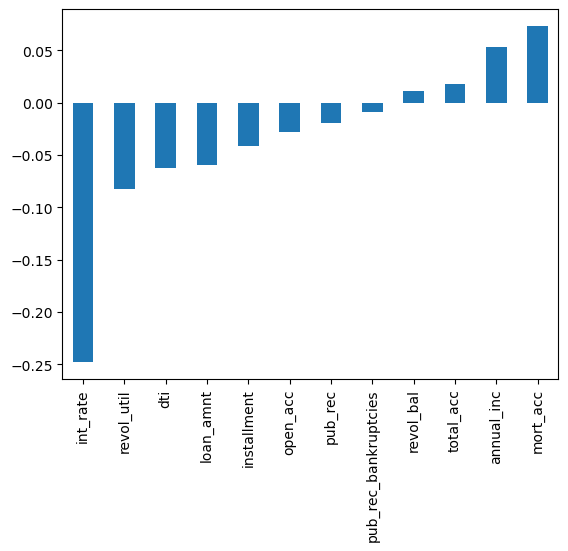

In [86]:
# 與是否繳清相關性
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')
plt.show()

## Data PreProcessing
#### Missing Data

In [90]:
df.shape[0]

396030

In [464]:
# 空值數量
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [88]:
# 空值佔的的趴數
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [89]:
# 職業名稱與在職年限
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [92]:
# 職業總數量
df['emp_title'].nunique()

173105

In [93]:
# 職業別數量
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [95]:
# 刪除職業名稱欄位
df = df.drop('emp_title', axis = 1)

In [102]:
# 在職年限種類
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

/var/folders/pw/qqmtppg56fs6hj9nq4rqltsc0000gn/T/ipykernel_92416/1141259987.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'emp_length', data = df,


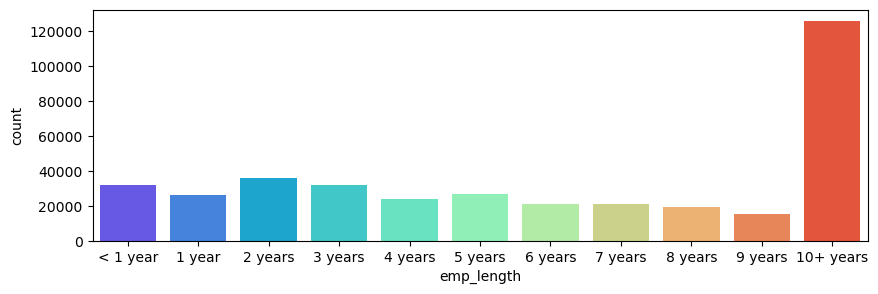

In [103]:
# 在職年限種類
plt.figure(figsize = (10, 3))

emp_length_order = [
 '< 1 year', 
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years', 
 '10+ years']

sns.countplot(x = 'emp_length', data = df, 
              order = emp_length_order, palette = 'rainbow'
              )
plt.show()

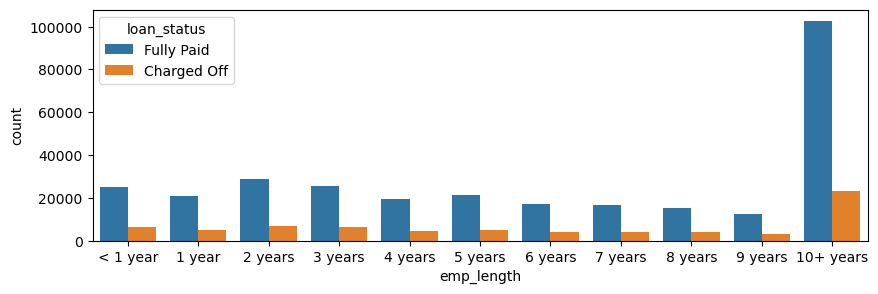

In [106]:
# 在職年限與是否付清關係，不同工作時長差不多
plt.figure(figsize = (10, 3))

sns.countplot(x = 'emp_length', data = df, 
              order = emp_length_order,
              hue = 'loan_status')
plt.show()

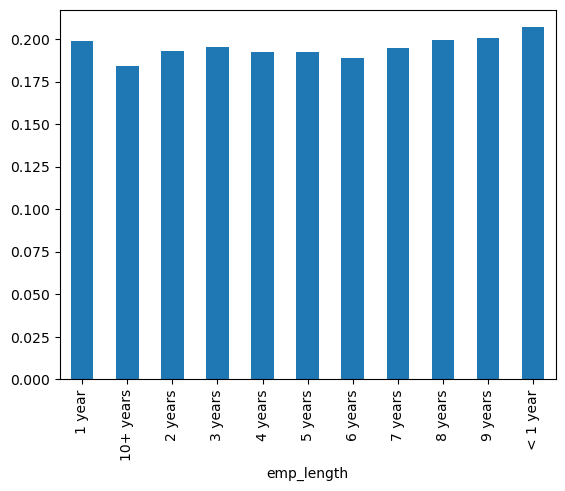

In [111]:
# 沒付清
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
# 有付清
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
# 沒付清比例，在職年限與是否付清無太大關係
emp_len = emp_co / (emp_fp + emp_co)
emp_len.plot(kind = 'bar')
plt.show()

In [112]:
# 刪除在職年限
df = df.drop('emp_length', axis = 1)

In [115]:
# 刪除標題，標題欄位為詳細的目的欄位資料
df = df.drop('title', axis = 1)

In [117]:
# 抵押賬戶數量
feat_info('mort_acc')

Number of mortgage accounts.


In [116]:
# 抵押賬戶數量
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [118]:
# 抵押帳戶數量相關性
df.corr(numeric_only = True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [124]:
# 依據總帳戶數量，取抵押帳戶平均數量
total_acc_avg = df.groupby('total_acc').mean('mort_acc')['mort_acc']

In [125]:
# 空值填入平均
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [126]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [129]:
# 刪除 revol_util, pub_rec_bankruptcies，少於 0.5%
df = df.dropna(subset = ['revol_util', 'pub_rec_bankruptcies'])

In [131]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [135]:
# 所有不為數字的欄位
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [137]:
# term 轉換數字
df['term'] = df['term'].str.extract('(\d+)')

In [138]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [139]:
# 刪除成績，成績為子成績的一部分
df = df.drop('grade', axis = 1)

In [140]:
# 子成績做 one-hot 轉換
dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis = 1)

In [147]:
# 四欄位做 one-hot 轉換
dummies_4 = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first = True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis = 1), dummies_4], axis = 1)

In [149]:
# home_ownership 種類數量
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [150]:
# home_ownership 取代
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [152]:
# home_ownership 做 one-hot 轉換
dummies_home = pd.get_dummies(df['home_ownership'], drop_first = True)
df = pd.concat([df.drop('home_ownership', axis = 1), dummies_home], axis = 1)

In [153]:
# 郵遞區號取數字
df['zip_code'] = df.apply(lambda address: address['address'][-5:], axis = 1)

In [154]:
# 郵遞區號做 one-hot 轉換
dummies_zip = pd.get_dummies(df['zip_code'], drop_first = True)
df = pd.concat([df.drop(['zip_code'], axis = 1), dummies_zip], axis = 1)

In [155]:
# 刪除地址
df = df.drop(['address'], axis = 1)

In [156]:
# 刪除事件日期
df = df.drop('issue_d', axis = 1)

In [163]:
# 取年份數字
df['earliest_cr_year'] = df.apply(lambda date: date['earliest_cr_line'][-4:], axis = 1)

In [164]:
# 刪除原日期欄位
df = df.drop('earliest_cr_line', axis = 1)

In [169]:
# 刪除貸款狀態文字列
df = df.drop('loan_status', axis = 1)

## Train Test Split

In [168]:
from sklearn.model_selection import train_test_split

In [171]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
scaler = MinMaxScaler()

In [177]:
X_train = scaler.fit_transform(X_train)

In [178]:
X_test = scaler.transform(X_test)

## Creating the Model

In [268]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [269]:
log_dir = 'logs/fit'

board = TensorBoard(log_dir = log_dir, 
                    histogram_freq=1, 
                    write_graph=True, 
                    write_images=True, 
                    update_freq='epoch', 
                    profile_batch=2, 
                    embeddings_freq=1)

2025-03-11 14:06:42.558738: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-03-11 14:06:42.558763: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-03-11 14:06:42.563235: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [270]:
df.shape

(395219, 79)

In [271]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [273]:
model.fit(x = X_train, y=y_train, 
          epochs=10, 
          batch_size = 256,
          callbacks=[board],
          validation_data = (X_test, y_test))

Epoch 1/10
  33/1236 [..............................] - ETA: 5s - loss: 0.5354

2025-03-11 14:07:53.897134: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-03-11 14:07:53.897152: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-03-11 14:07:53.907677: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2025-03-11 14:07:53.916079: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2025-03-11 14:07:53.931139: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: logs/fit/plugins/profile/2025_03_11_14_07_53/liuqianhuadeMacBook-Pro.local.xplane.pb


1236/1236 [==============================] - 6s 4ms/step - loss: 0.2974 - val_loss: 0.2641
Epoch 2/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2652 - val_loss: 0.2628
Epoch 3/10
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2628 - val_loss: 0.2626
Epoch 4/10
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2616 - val_loss: 0.2622
Epoch 5/10
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2611 - val_loss: 0.2623
Epoch 6/10
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2616
Epoch 7/10
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 8/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2597 - val_loss: 0.2614
Epoch 9/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 10/10
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2592 - val_los

In [274]:
from tensorflow.keras.models import load_model

In [275]:
model.save('LendingClub.keras')

## Evaluating

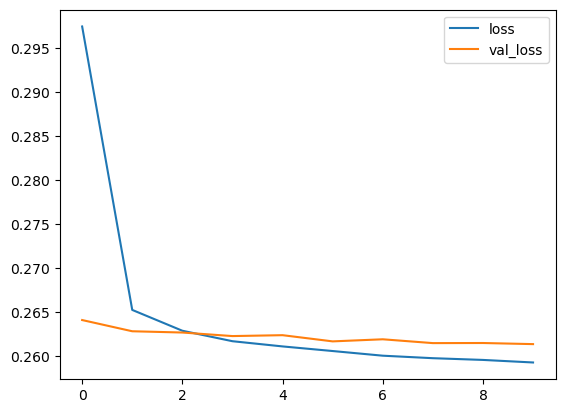

In [276]:
loses = pd.DataFrame(model.history.history)
loses.plot()
plt.show()

In [277]:
pred = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [278]:
from sklearn.metrics import confusion_matrix, classification_report

In [279]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 6786  8872]
 [   57 63329]]


              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



## test random data

In [262]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [263]:
new_customer = scaler.transform(new_customer.values.reshape(1, 78))

In [264]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 21ms/step


array([[1]], dtype=int32)

In [265]:
df.iloc[random_ind]['loan_repaid']

1